# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

# Perform API Calls

Perform a weather check on each city using a series of successive API calls.

Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Define base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [5]:
# Build query url
query = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# Setup my lists and counters

index_count = 0
set_count = 1

city_list = []
country_list = []
lats_list = []
lngs_list = []
cloudiness_list = []
humidity_list = []
temp_max_list = []
wind_speed_list = []
date_list = []

In [10]:
# Perform the API Calls

print("Beginning Data Retrieval")     
print("-----------------------------")

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query + city).json()
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        cloudiness_list.append(response["clouds"]["all"])      
        humidity_list.append(response["main"]["humidity"])       
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        date_list.append(response["dt"])
      
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
        
        else:
            index_count = index_count + 1
        
        print(f"Processing Record {index_count} of Set {set_count} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 : albany
Processing Record 2 of Set 1 : lanigan
Processing Record 3 of Set 1 : mataura
Processing Record 4 of Set 1 : yellowknife
Processing Record 5 of Set 1 : pahrump
City not found. Skipping...
Processing Record 6 of Set 1 : mar del plata
City not found. Skipping...
Processing Record 7 of Set 1 : hukuntsi
Processing Record 8 of Set 1 : hithadhoo
Processing Record 9 of Set 1 : bubaque
Processing Record 10 of Set 1 : atuona
Processing Record 11 of Set 1 : adrar
Processing Record 12 of Set 1 : grenaa
Processing Record 13 of Set 1 : weligama
Processing Record 14 of Set 1 : ushuaia
Processing Record 15 of Set 1 : faanui
Processing Record 16 of Set 1 : beringovskiy
Processing Record 17 of Set 1 : bengkulu
Processing Record 18 of Set 1 : oranjemund
Processing Record 19 of Set 1 : hermanus
Processing Record 20 of Set 1 : hobyo
City not found. Skipping...
Processing Record 21 of Set 1 : margate
Processing Rec

Processing Record 33 of Set 4 : mporokoso
Processing Record 34 of Set 4 : vardo
Processing Record 35 of Set 4 : hasaki
Processing Record 36 of Set 4 : torbay
Processing Record 37 of Set 4 : zheleznodorozhnyy
Processing Record 38 of Set 4 : tay ninh
Processing Record 39 of Set 4 : minot
Processing Record 40 of Set 4 : morant bay
Processing Record 41 of Set 4 : fort morgan
Processing Record 42 of Set 4 : bonnyville
Processing Record 43 of Set 4 : northam
Processing Record 44 of Set 4 : erenhot
Processing Record 45 of Set 4 : nanortalik
Processing Record 46 of Set 4 : puri
Processing Record 47 of Set 4 : sao miguel do araguaia
City not found. Skipping...
Processing Record 48 of Set 4 : elko
Processing Record 49 of Set 4 : aksarka
Processing Record 50 of Set 4 : fortuna
Processing Record 0 of Set 5 : hakui
Processing Record 1 of Set 5 : nauen
Processing Record 2 of Set 5 : brigham city
Processing Record 3 of Set 5 : quatre cocos
Processing Record 4 of Set 5 : minbu
Processing Record 5 of S

Processing Record 20 of Set 8 : sosva
Processing Record 21 of Set 8 : luanda
Processing Record 22 of Set 8 : katsuura
Processing Record 23 of Set 8 : marechal candido rondon
City not found. Skipping...
Processing Record 24 of Set 8 : popondetta
Processing Record 25 of Set 8 : moose factory
Processing Record 26 of Set 8 : waingapu
City not found. Skipping...
Processing Record 27 of Set 8 : yanam
Processing Record 28 of Set 8 : wattegama
Processing Record 29 of Set 8 : manzhouli
Processing Record 30 of Set 8 : lasa
Processing Record 31 of Set 8 : varkkallai
Processing Record 32 of Set 8 : tres lagoas
Processing Record 33 of Set 8 : puerto del rosario
Processing Record 34 of Set 8 : xapuri
Processing Record 35 of Set 8 : ancud
Processing Record 36 of Set 8 : kamenka
Processing Record 37 of Set 8 : dhilwan
Processing Record 38 of Set 8 : giyani
Processing Record 39 of Set 8 : inta
Processing Record 40 of Set 8 : krasnoselkup
Processing Record 41 of Set 8 : emba
Processing Record 42 of Set 

# Convert Raw Data to DataFrame

Export the city data into a .csv.

Display the DataFrame

In [11]:
#Create the Data Frame from the data retrieval 

weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [12]:
# Count data to make sure > 500
weather_data.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Clouds        549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [13]:
# Display DataFrame of df (defined above)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,47.68,76,96,1.01,US,1635037565
1,Lanigan,51.8501,-105.0344,41.65,54,100,16.53,CA,1635037883
2,Mataura,-46.1927,168.8643,64.89,61,100,1.07,NZ,1635037710
3,Yellowknife,62.4560,-114.3525,41.56,86,100,13.00,CA,1635037495
4,Pahrump,36.2083,-115.9839,73.06,36,1,1.99,US,1635037883


In [14]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"

weather_data.to_csv("census_data.csv", encoding="utf-8", index=False)

In [20]:
# Use Describe to display count, mean, std, etc... for numerical values like in starter code
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,18.994412,15.440526,59.861202,72.856102,53.981785,7.671931,1.635038e+09
std,33.219161,90.990166,20.359506,19.273939,40.965755,5.298121,1.126141e+02
min,-54.800000,-175.200000,-6.090000,12.000000,0.000000,0.000000,1.635037e+09
25%,-8.753700,-66.865400,45.450000,64.000000,8.000000,3.440000,1.635038e+09
50%,20.502200,21.688600,63.250000,77.000000,61.000000,6.640000,1.635038e+09
75%,48.232500,91.275000,76.780000,87.000000,98.000000,10.940000,1.635038e+09
max,78.218600,179.316700,95.050000,100.000000,100.000000,32.500000,1.635038e+09


# Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [18]:
weather_data_2 = weather_data[weather_data["Humidity"] > 100]
weather_data_2.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date


In [21]:
# No cities with humidity > 100%

# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

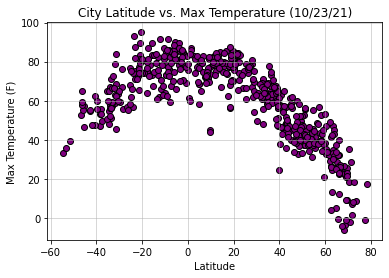

In [23]:
#Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "purple", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (10/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs Max Temperature.png")

In [ ]:
#explain what the code is analyzing

# The code is plotting the max temperatures, for the cities in my sample of 549 cities, against the latitude. 
# It shows that the closer you get to the equator, where the latitude = 0, the higher the max tempurature gets. 

# Latitude vs. Humidity Plot

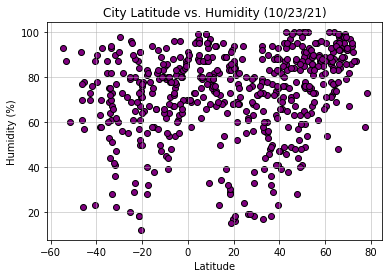

In [25]:
#Latitude vs. Humidity scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "purple", edgecolor = "black")

plt.title("City Latitude vs. Humidity (10/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs Humidity.png")

In [ ]:
#explain what the code is analyzing

# The code is plotting the Humidity percentage, for the cities in my sample of 549 cities, against the latitude. 
# It seems that near the equator (latitude = 0) the humidity tends to be high. 
# Although, there are many high humidity cities near lat = 60. Will be intersting to further look into this relationship.

# Latitude vs. Cloudiness Plot

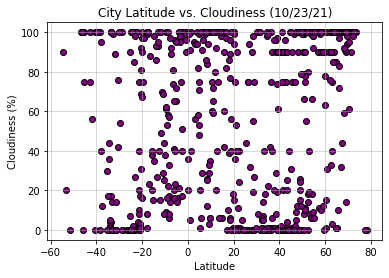

In [27]:
#Latitude vs. Cloudiness scatter plot
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "purple", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (10/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs Cloudiness.png")

In [ ]:
#explain what the code is analyzing

# The code is plotting the Cloudiness percentage, for the cities in my sample of 549 cities, against the latitude. 
# Doesn't seem to be much of a relationship

# Latitude vs. Wind Speed Plot

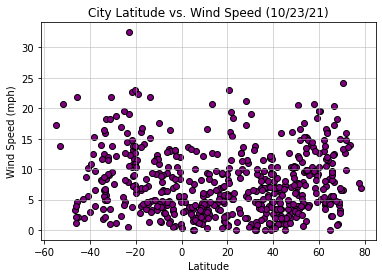

In [29]:
#Latitude vs. Wind Speed plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "purple", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (10/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs Wind Speed.png")

In [ ]:
#explain what the code is analyzing

# The code is plotting the Wind Speed, for the cities in my sample of 549 cities, against the latitude. 
# Doesn't seem to be much of a relationship

# Linear Regression

In [34]:
# Creating a North and a South DataFrame so that I can complete the regression for each group separately

north_df = weather_data.loc[weather_data['Lat']>0]
south_df = weather_data.loc[weather_data['Lat']<0]

In [35]:
south_df.count()

City          181
Lat           181
Lng           181
Max Temp      181
Humidity      181
Clouds        181
Wind Speed    181
Country       181
Date          181
dtype: int64

In [36]:
north_df.count()

City          368
Lat           368
Lng           368
Max Temp      368
Humidity      368
Clouds        368
Wind Speed    368
Country       368
Date          368
dtype: int64

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

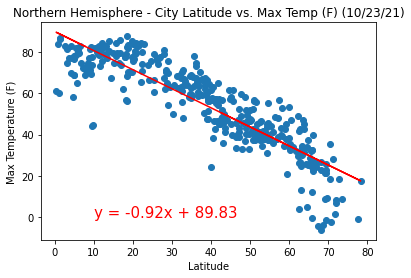

The r-squared is: 0.7761902456920304


<Figure size 432x288 with 0 Axes>

In [64]:
# Create the plot and Add the linear regression equation and line
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - City Latitude vs. Max Temp (F) (10/23/21)")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("North_Max Temp Regression.png")

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

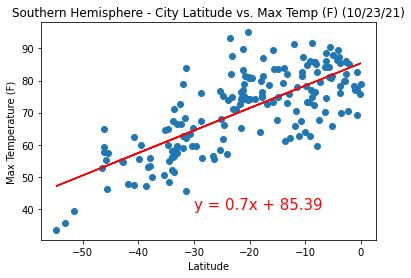

The r-squared is: 0.5514174806815221


<Figure size 432x288 with 0 Axes>

In [65]:
# Create the plot and Add the linear regression equation and line
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - City Latitude vs. Max Temp (F) (10/23/21)")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("South_Max Temp Regression.png")

In [ ]:
# Analysis of Northern and Southern Hemispheres: Max Temp vs. Latitude Linear Regression

# The linear regression is telling me that the relationship between latitude and max temp is pretty highly correlated. 
# I could see this somewhat in the origibal Latitude and Max temp scatter plot, but it's much more clear when dividing into hemispheres.
# This confirms that warmer temperatures are expected the closer you get to the equator (latitude = 0)

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

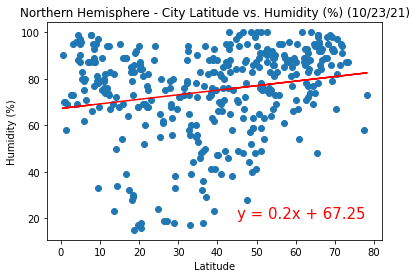

The r-squared is: 0.04169195950442559


<Figure size 432x288 with 0 Axes>

In [66]:
# Create the plot and Add the linear regression equation and line
x_values = north_df["Lat"]
y_values = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (%) (10/23/21)")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("North_Humidity Regression.png")

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

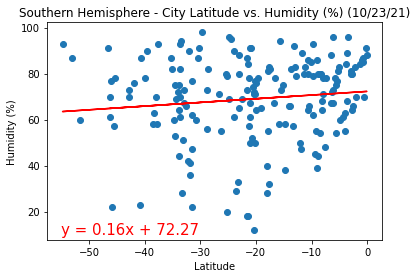

The r-squared is: 0.013213830967138653


<Figure size 432x288 with 0 Axes>

In [67]:
# Create the plot and Add the linear regression equation and line
x_values = south_df["Lat"]
y_values = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (%) (10/23/21)")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("South_Humidity Regression.png")

In [ ]:
# Analysis of Northern and Southern Hemispheres: Humidity vs. Latitude Linear Regression

# The linear regression doesn't seem to be very strong. 
# in the northern hemisphere, humidity seems to increase the further you get away from the equator
# in the southern hemisphere, I see the opposite. Humidity decreases as you get away from the equator
# Could be that the seasons are different in the north and south

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

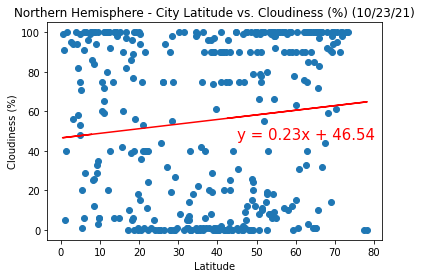

The r-squared is: 0.013041470960267884


<Figure size 432x288 with 0 Axes>

In [68]:
# Create the plot and Add the linear regression equation and line
x_values = north_df["Lat"]
y_values = north_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,46),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (%) (10/23/21)")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("North_Cloudiness Regression.png")

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

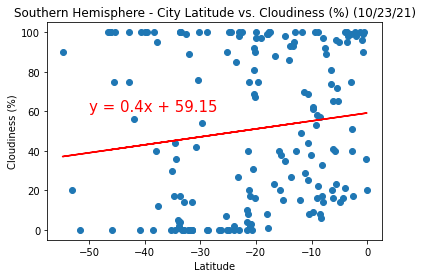

The r-squared is: 0.01778462846468375


<Figure size 432x288 with 0 Axes>

In [69]:
# Create the plot and Add the linear regression equation and line
x_values = south_df["Lat"]
y_values = south_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (%) (10/23/21)")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("South_Cloudiness Regression.png")

In [ ]:
# Analysis of Northern and Southern Hemispheres: Cloudiness vs. Latitude Linear Regression

# The linear regression doesn't seem to be very strong. 
# in the northern hemisphere, cloudiness seems to increase the further you get away from the equator
# in the southern hemisphere, I see the opposite. Cloudiness decreases as you get away from the equator
# Overall there are a lot of cities across all latitudes that have 100% and 0% cloudiness

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

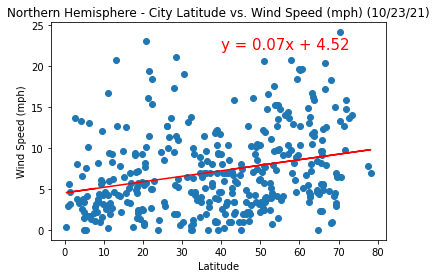

The r-squared is: 0.07359053565651047


<Figure size 432x288 with 0 Axes>

In [70]:
# Create the plot and Add the linear regression equation and line
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (mph) (10/23/21)")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("North_Wind Speed Regression.png")

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

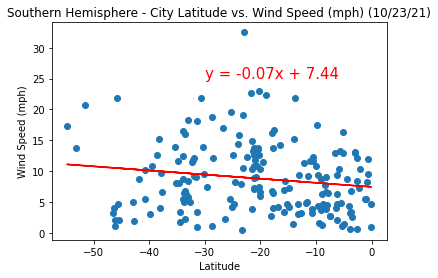

The r-squared is: 0.024393904275639474


<Figure size 432x288 with 0 Axes>

In [71]:
# Create the plot and Add the linear regression equation and line
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (mph) (10/23/21)")
plt.show()

print(f"The r-squared is: {rvalue**2}")
plt.savefig("South_Wind Speed Regression.png")

In [ ]:
# Analysis of Northern and Southern Hemispheres: Wind Speed vs. Latitude Linear Regression

# The linear regression doesn't seem to be very strong. 
# in the northern hemisphere, Wind Speed seems to increase the further you get away from the equator
# in the southern hemisphere, I see the same. Wind Speed increases slightly as you get away from the equator